## Exploratory Data Analysis

    Dataset url: https://archive.ics.uci.edu/ml/datasets/Statlog+(Shuttle)
    Classification problem

In [1]:
import numpy as pd
import pandas as pd

# plot
import matplotlib.pyplot as plt
import seaborn as sns

Plot info

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})
fontdict = {'fontsize': 18,
           'weight' : 'bold'}
palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
sns.set()

### Read Data

In [3]:
df_train = pd.read_csv('./data/shuttle.trn', delimiter=' ', header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


In [4]:
# rename columns
columns = {}
names = [(x, 'Var ' + str(x)) for x in df_train.columns]
for old, new in names:
    columns[old] = new
    
df_train = df_train.rename(columns=columns)
df_train = df_train.rename(columns={'Var 9': 'target'})

In [5]:
df_train.describe()

,Var 0,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,target
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,1.700529
std,12.252618,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,1.354648
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


### Distribuição das classes

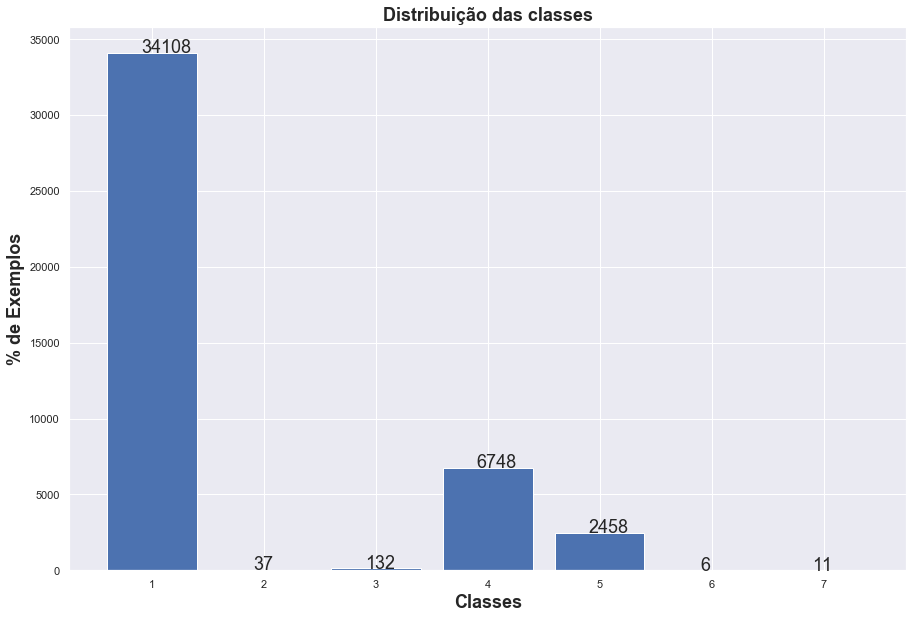

In [6]:
dist = df_train.iloc[:, -1].value_counts()
#plot
plt.bar(dist.index, dist)
# info
plt.title("Distribuição das classes", fontdict=fontdict)
plt.ylabel("% de Exemplos", fontdict=fontdict)
plt.xlabel("Classes", fontdict=fontdict);
# plot values
for i in dist.index:
    plt.text(i - 0.1, dist[i], dist[i], 
              fontsize=18)

    As classes 2, 3, 6 e 7 contem menos de 1% dos casos da base
Consideramos essa base de dados muito desbalanceada e isso deverá ser tratado no preprocessamento

### Histograma

In [7]:
df_train.hist??

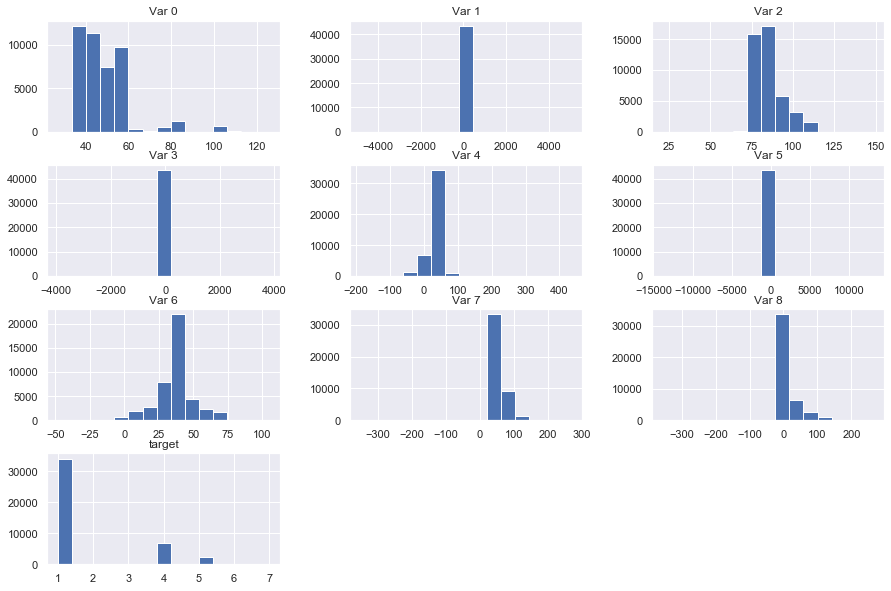

In [8]:
df_train.hist(bins=15, );

Analisamos que as variaveis Var 1, Var 3, Var 5 contem muitos outliers, será necessario removelos para podermos realizar a analise corretamente.

### Pairplot

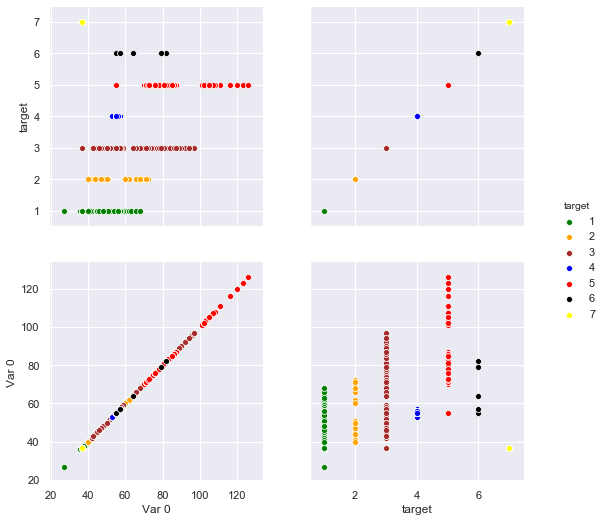

In [13]:
f = sns.pairplot(df_train, x_vars=['Var 0', 'target'], y_vars=['target', 'Var 0'], hue='target', 
                palette=palette, )
f.fig.set_size_inches(9, 8)

Considerando as classes com mais exemplos(1, 4, 5)
    A classe majoritaria(Classe 1, cor Verde) ocorre até aproximadamente o valor 70 no tempo.
    A classe 4 ocorre em um periodo bem especifico
    A classe 5 tem uma distribuição mais abrangente, porém é possivel perceber que os valores começam aparti do momento que a Classe 1 acaba

### Relação do tempo com as demais variaveis

In [ ]:
sns.scatterplot(x='Var 0', y='Var 2', hue='target', data=df_train, style='target', 
                    palette=palette, legend='full');

In [ ]:
sns.scatterplot(x='Var 0', y='Var 4', hue='target', data=df_train, style='target', 
                    palette=palette, legend='full');

In [ ]:
sns.scatterplot(x='Var 0', y='Var 6', hue='target', data=df_train, style='target', 
                    palette=['green','orange','brown','blue', 'red', 'black', 'yellow'], legend='full');

### Correlação

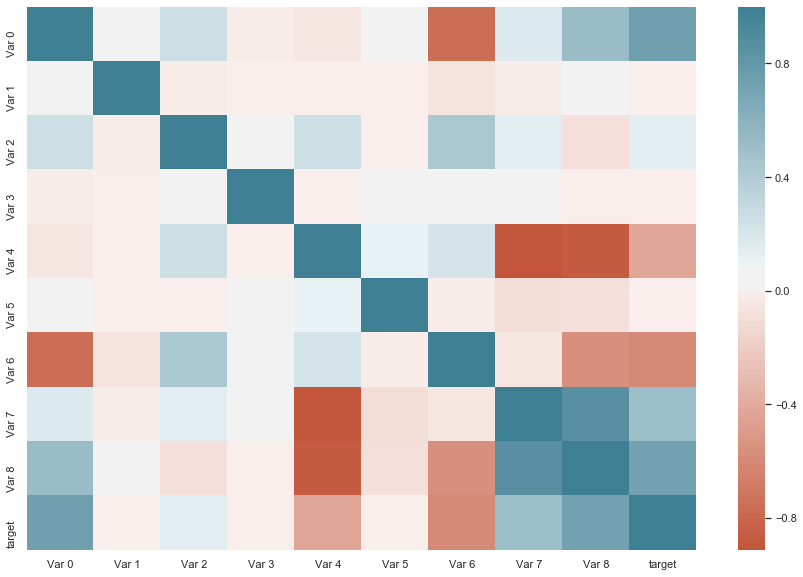

In [10]:
corr = df_train.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))